In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Definir la función para el pulso rectangular
def pulso_rectangular(t, ancho):
    return np.where(np.abs(t) <= ancho/2, 1, 0)

In [21]:
# Definir la función para el pulso sinc en el dominio temporal
def pulso_sinc(t):
    return np.sinc(t)

In [22]:
# Definir la función para el pulso de coseno elevado
def pulso_coseno_elevado(t, alpha, Ts):
    numerador = np.sin(np.pi * t * (1 - alpha) / Ts) + 4 * alpha * t / Ts * np.cos(np.pi * t * (1 + alpha) / Ts)
    denominador = np.pi * t * (1 - (4 * alpha * t / Ts) ** 2) / Ts
    return np.where(np.abs(denominador) > 0, numerador / denominador, 1)

In [23]:
# Transformada de Fourier
def transformada_fourier(senal, t):
    dt = t[1] - t[0]
    f = np.fft.fftfreq(len(t), d=dt)
    return np.fft.fftshift(f), np.fft.fftshift(np.abs(np.fft.fft(senal)))

In [24]:
# Definir el dominio temporal
t = np.linspace(-1, 1, 1000)

In [25]:
# Pulsos
rectangular = pulso_rectangular(t, 0.5)
sinc = pulso_sinc(t)
coseno_elevado = pulso_coseno_elevado(t, 0.5, 0.5)

In [26]:
# Transformadas de Fourier
f_rectangular, FT_rectangular = transformada_fourier(rectangular, t)
f_sinc, FT_sinc = transformada_fourier(sinc, t)
f_coseno_elevado, FT_coseno_elevado = transformada_fourier(coseno_elevado, t)

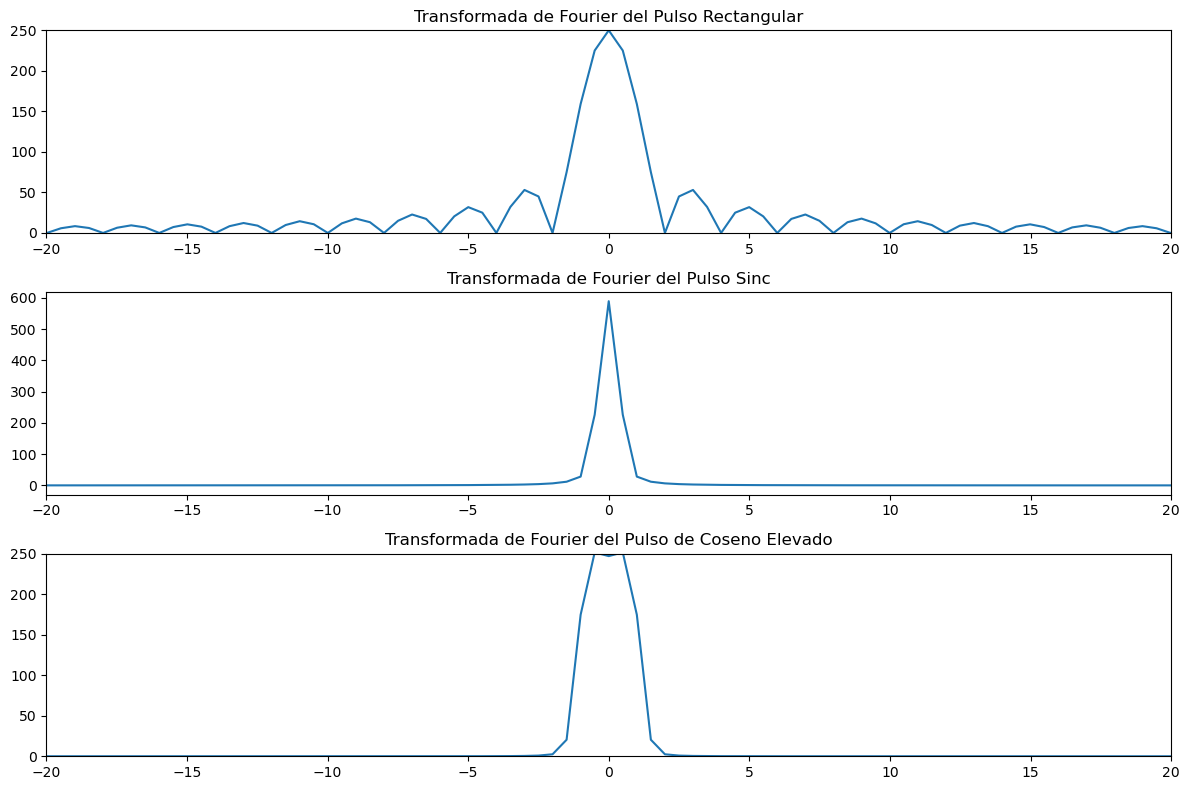

In [27]:
# Gráficos de las transformadas de Fourier
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(f_rectangular, FT_rectangular)
plt.xlim(-20, 20)       # Ajustar escala de frecuencia
plt.ylim(0, 250)   # Ajustar escala de amplitud
plt.title("Transformada de Fourier del Pulso Rectangular")

plt.subplot(3, 1, 2)
plt.plot(f_sinc, FT_sinc)
plt.xlim(-20, 20)        # Ajustar escala de frecuencia
plt.title("Transformada de Fourier del Pulso Sinc")

plt.subplot(3, 1, 3)
plt.plot(f_coseno_elevado, FT_coseno_elevado)
plt.xlim(-20, 20)   # Ajustar escala de frecuencia
plt.ylim(0, 250)   # Ajustar escala de amplitud
plt.title("Transformada de Fourier del Pulso de Coseno Elevado")

plt.tight_layout()
plt.show()

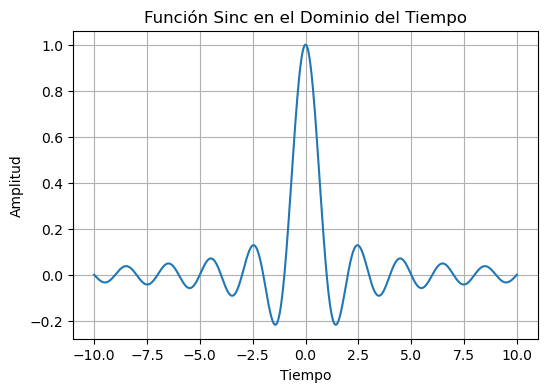

In [28]:
# Gráfico del pulso sinc en el dominio del tiempo

# Definir el dominio temporal más amplio para visualizar mejor el pulso sinc
t_sinc = np.linspace(-10, 10, 1000)

# Generar la señal sinc
senal_sinc = pulso_sinc(t_sinc)

# Graficar la función sinc en el dominio temporal
plt.figure(figsize=(6, 4))
plt.plot(t_sinc, senal_sinc)
plt.title("Función Sinc en el Dominio del Tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

C:\Users\Juan Gerez Jimenez\AppData\Local\Temp\ipykernel_17600\2769107871.py:12: RuntimeWarning: invalid value encountered in divide
  return np.where(np.abs(t) == 0, 1.0, numerador / denominador)


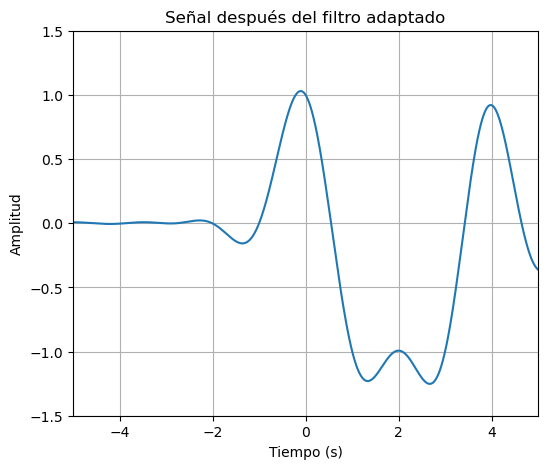

In [29]:
# Simulación de interferencia entre símbolos con filtro adaptado

# Parámetros
T = 1
alpha = 0.5
t = np.linspace(-5*T, 5*T, 1000)

# Pulso raíz cuadrada de coseno elevado
def pulso_rrc(t, T, alpha):
    numerador = np.sin(np.pi * t / T * (1 - alpha)) + 4 * alpha * t / T * np.cos(np.pi * t / T * (1 + alpha))
    denominador = np.pi * t / T * (1 - (4 * alpha * t / T)**2)
    return np.where(np.abs(t) == 0, 1.0, numerador / denominador)

# Señal 2-PAM
bits = np.random.randint(0, 2, 10)
simbolos = 2 * bits - 1  # Mapeo 0->-1, 1->1
senal_tx = np.zeros(len(t))
for i, simbolo in enumerate(simbolos):
    senal_tx += simbolo * pulso_rrc(t - i*T, T, alpha)

# Filtro adaptado
filtro_adaptado = pulso_rrc(-t, T, alpha)
senal_rx = np.convolve(senal_tx, filtro_adaptado, mode='same') * (t[1] - t[0])

# Gráfico de la señal filtrada
plt.figure(figsize=(6, 5))
plt.plot(t, senal_rx)
plt.xlim(-5, 5)   # Ajustar escala de tiempo
plt.ylim(-1.5, 1.5)  # Ajustar escala de amplitud
plt.title("Señal después del filtro adaptado")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()
